# Проект по статистике данных о видеоиграх

Цель проекта : исследовать набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

Имеются следующие поля в таблице:

- Rank – место по объему продаж
- Name – название игры
- Platform – платформа, на которой выпущена игра
- Genre – жанр
- Publisher – издатель
- NA_Sales – продажи в Северной Америке, в млн.
- EU_Sales – продажи в Европе, в млн.
- JP_Sales – продажи в Японии, в млн.
- Other_Sales – продажи в остальном мире, в млн.
- Global_Sales – продажи по всему миру, в млн.


В данном проекты мы ответим на следующие вопросы: 

1. Загрузим данные и убедимся, что всё считалось правильно: посмотрим на столбцы, размер, наличие пропущенных значений (если есть – удалим). Также изучим типы переменных

2. Построим график распределения количества выпущенных игр по годам и выведем описательные характеристики переменной Year

3. Выясним, на каких платформах произошло больше всего релизов

4. Посмотрим игры каких издателей (Publisher) встречаются в датасете чаще всего

5. Ответим на вопрос: в каком регионе медианное значение объема продаж игр Nintendo является наибольшим? 

6. Изучим объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрим на медиану, среднее, межквартильный размах.

7. Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. Ответим на вопрос: в какие моменты времени было продано больше всего игр жанра Sports?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

### 1. Загрузка данных и изучение типа переменных

In [2]:
# считывает данные, смотрим их характеристики через метод info()

games = pd.read_csv('/Users/oksana_khoroshun/Documents/Python/games.csv') 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Типы переменных в таблице:
			
| Столбец | Тип переменной | 
| --- | --- |
| Rank | ранговая | 
|Name | номинативная |	
|Platform | номинативная |						
|Genre | номинативная |				
|Publisher | номинативная |			
|Year | дискретная |		
|NA_Sales | непрерывная |			
|EU_Sales | непрерывная |				
|JP_Sales | непрерывная |				
|Other_Sales | непрерывная |				
|Global_Sales | непрерывная |

In [3]:
#смотрим первые 5 строк

games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# удаляем пропущенные значения

games.dropna(subset=['Year', 'Publisher'], inplace=True)

In [5]:
# переводим названия стобцов в нижный регистр

games.columns = [x.lower() for x in games.columns]

### 2. График распределения количества выпущенных игр по годам и описательные характеристики переменной Year

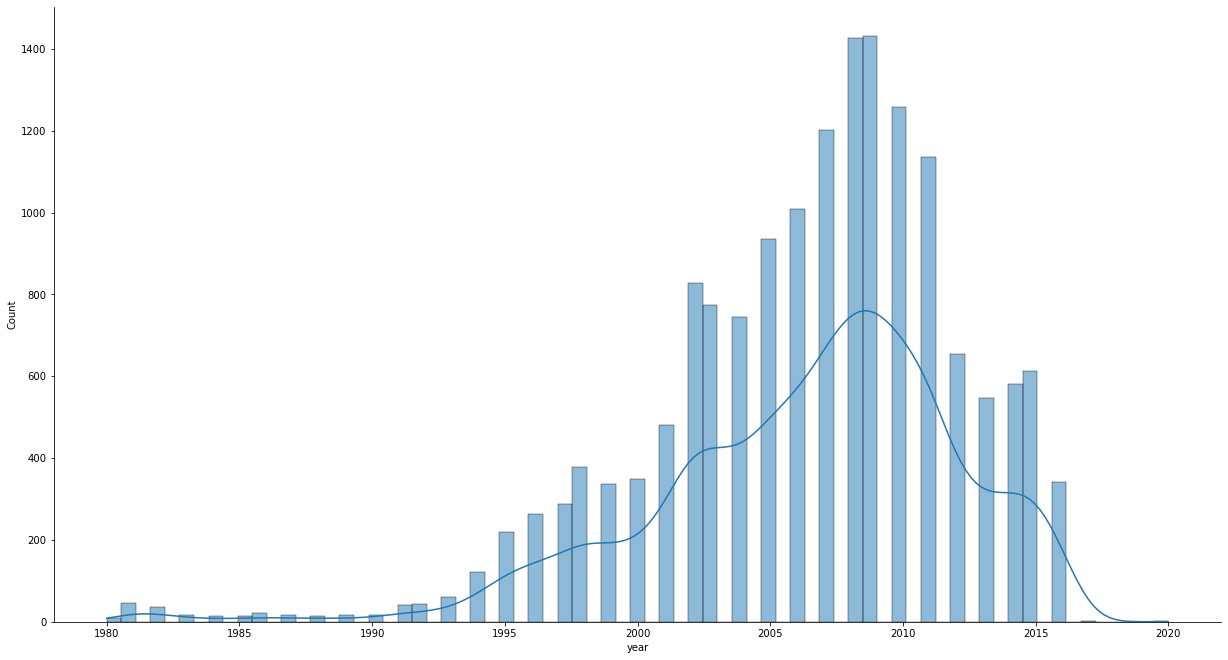

In [6]:
g = sns.displot(data=games,
            x='year',
            kde=True)

g.figure.set_figwidth(20)
g.figure.set_figheight(10)

In [7]:
games.year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

Из данных описательной статистики столбца year делаем выводы, что:

1. Мода равна 2009 
2. Медиана больше, чем среднее 
3. Примерно половина игр была выпущена после 2007 года 

### 3. Выясним, на каких платформах произошло больше всего релизов
 
Оставим названия только тех платформ, частота встречаемости которых составляет более 7%. 

In [8]:
# вычислим частоту в % и сохраним в переменную platform_percent

platform_percent = games.platform.value_counts(normalize=True) * 100

In [9]:
platform_percent 

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
PC       5.757780
XB       4.929102
GBA      4.824750
GC       3.326990
3DS      3.063041
PSV      2.516727
PS4      2.062488
N64      1.939721
SNES     1.467068
XOne     1.307470
SAT      1.061936
WiiU     0.877785
2600     0.712050
NES      0.601559
GB       0.595421
DC       0.319195
GEN      0.165736
NG       0.073660
SCD      0.036830
WS       0.036830
3DO      0.018415
TG16     0.012277
GG       0.006138
PCFX     0.006138
Name: platform, dtype: float64

In [10]:
# переведем серию в датафрейм для удобства исследования

platform_percent = platform_percent.to_frame(name='value').reset_index()

In [11]:
# переименуем столбцы в новом датафрейме platform_percent

platform_percent = platform_percent.rename(columns= {'index': 'platform'})

In [12]:
# отберем платформы, у которых частота встречаемости составляем более 7%

platform_percent.query('value > 7.0')

,platform,value
0,DS,13.080842
1,PS2,13.056289
2,PS3,8.004420
3,Wii,7.918483
4,X360,7.574735
5,PSP,7.347615
6,PS,7.298508


Итак, у нас есть 7 платформ, у которых частота встречаемости составляем более 7%:
DS, PS2, PS3, Wii, X360, PSP, PS

### 4. Посмотрим, игры каких издателей (Publisher) встречаются в датасете чаще всего

In [13]:
scipy.stats.mode(games.publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

Итак, издатель Electronic Arts чаще всего встречается в данных

### 5.  В каком регионе медианное значение объема продаж игр Nintendo является наибольшим

In [14]:
# отсортировываем игры Nintendo

games_nintendo = games[games['publisher'] == 'Nintendo']


In [15]:
# смотрим описательную статистику

games_nintendo.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,696.000000,696.00000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
std,3969.268372,7.77637,2.989913,1.743953,1.063110,0.464170,5.676925
min,1.000000,1983.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,710.750000,2000.00000,0.010000,0.007500,0.090000,0.000000,0.300000
50%,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000
75%,5901.750000,2009.00000,0.972500,0.482500,0.740000,0.090000,2.262500
max,16545.000000,2016.00000,41.490000,29.020000,10.220000,8.460000,82.740000


Таким образом, медианное значение объема продаж является наибольшим в регионе Северная Америка

### 6. Изучение объемов продаж игр Nintendo в Японии с разбивкой жанрам. Медиана, среднее, межквартильный размах.


Посмотрим на продажи Nintendo в Японии по жанрам. Построим боксплот, где:

- по оси x будет расположен жанр игры (Genre)
- по оси у – объем продаж в Японии (JP_sales)


<AxesSubplot:xlabel='genre', ylabel='jp_sales'>

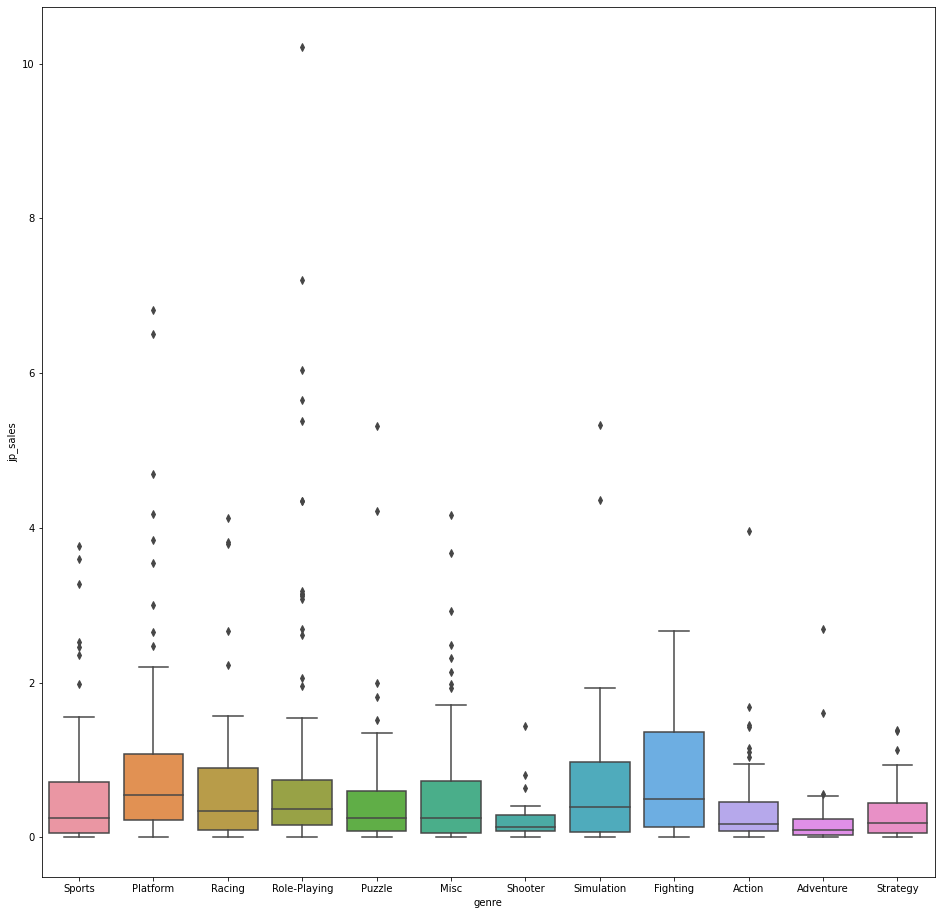

In [16]:
plt.figure(figsize=(16,16))
sns.boxplot(x='genre', y='jp_sales', data=games_nintendo)

Исходя из графиков можно сделать вывод, что:
1. Наибольший межквартильный размах наблюдается у игр жанра Fighting
2. Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
3. Межквартильный размах у Strategy меньше, чем у Puzzle

### 7. Визуализация динамики изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo в определенных жанрах

Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих 
жанров: Fighting, Simulation, Platform, Racing, Sports.


In [17]:
# посмотрим на частоты встречаемости жанров для игр Nintendo

games_nintendo.genre.value_counts()

Platform        111
Role-Playing    105
Misc            100
Action           78
Puzzle           74
Sports           55
Racing           37
Adventure        35
Strategy         31
Simulation       28
Shooter          24
Fighting         18
Name: genre, dtype: int64

In [18]:
# отсортируем необходимые столбцы и жанры в новую переменную

games_nintendo_global = games_nintendo[['year', 'genre', 'global_sales']] \
                        .query("genre in ('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports')")


In [19]:
games_nintendo_global

,year,genre,global_sales
0,2006.0,Sports,82.74
1,1985.0,Platform,40.24
2,2008.0,Racing,35.82
3,2009.0,Sports,33.00
6,2006.0,Platform,30.01
...,...,...,...
12123,2010.0,Sports,0.07
12770,2005.0,Simulation,0.06
14626,2006.0,Sports,0.03
14968,2016.0,Simulation,0.02


<AxesSubplot:xlabel='year', ylabel='global_sales'>

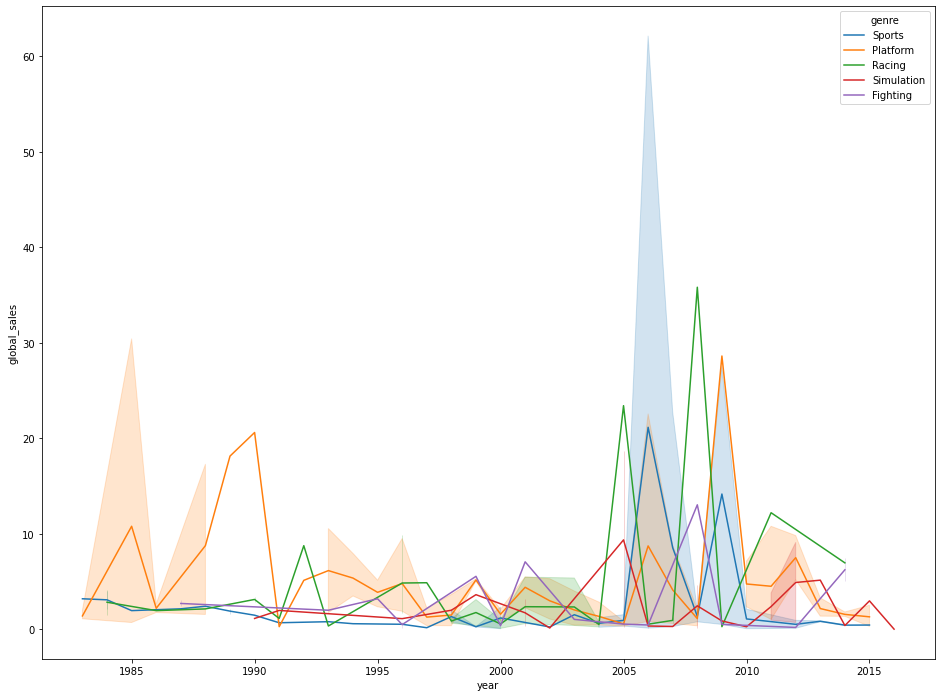

In [20]:
# строим линейный график

plt.figure(figsize=(16,12))
sns.lineplot(x = 'year', y = 'global_sales', hue = 'genre', data=games_nintendo_global)

Таким образом, мы видим, что наибольшее количество копий игр жанра Sports было продано на отрезке времени 2005-2010 гг.

## Заключение 

В этом проекте мы изучали данные о видеоиграх:

1. Построили график распределения количества выпущенных игр по годам и увидели, что наибольшее количество выпущенных игр было достигнуто в 2008-2009 гг.

2. Выяснили, что на платформах DS, PS2, PS3, Wii, X360, PSP, PS произошло больше всего релизов

3. Выяснили, что игры  издателя Electronic Arts встречаются в датасете чаще всего

4. Посчитали,что медианное значение объема продаж является наибольшим в регионе Северная Америка

5. Визуализировали объемы продаж игр Nintendo в Японии с разбивкой жанрам и выяснили, что наибольший межквартильный размах наблюдается у игр жанра Fighting

6. Визуализировали динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo в жанрах Fighting, Simulation, Platform, Racing, Sports и выяснили, что в 2005-2010 гг. было продано наибольшее количество копий игр жанра Sports.
